Saving US_Accidents_March23_1.csv to US_Accidents_March23_1 (2).csv


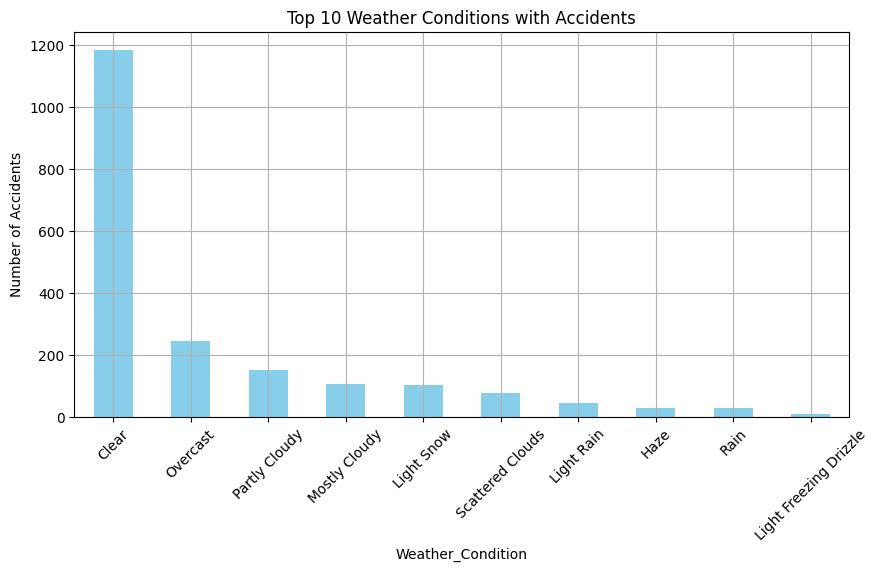

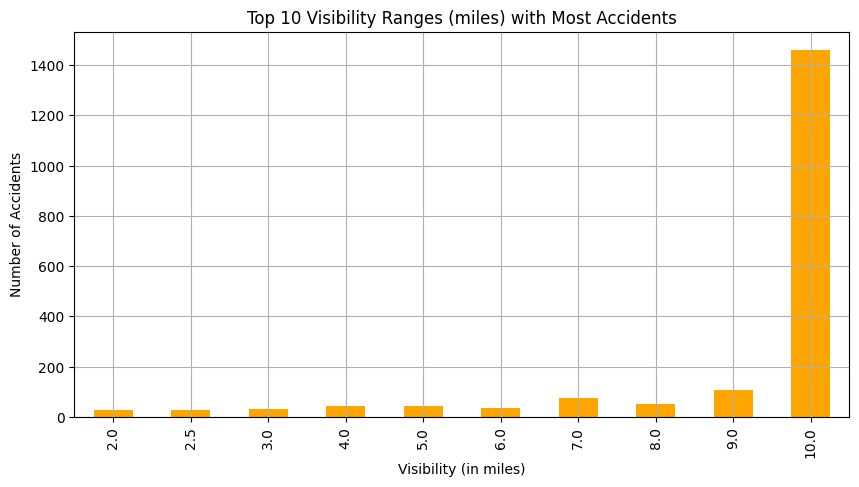

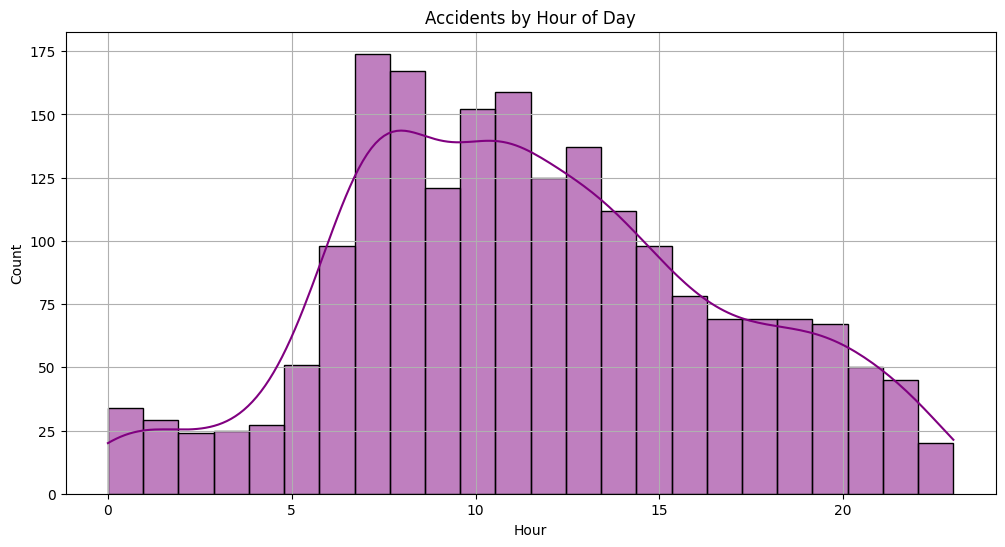

In [3]:
!pip install geopandas folium plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px

# Upload CSV manually in Colab or download from Kaggle
from google.colab import files
uploaded = files.upload()

# Replace with your filename if different
df = pd.read_csv('US_Accidents_March23_1.csv')
df.head()

# Drop rows with null lat/lon
df = df.dropna(subset=['Start_Lat', 'Start_Lng'])

# Convert Start_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])


plt.figure(figsize=(10,5))
df['Weather_Condition'].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Weather Conditions with Accidents')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
df['Visibility(mi)'].dropna().astype(float).round(1).value_counts().nlargest(10).sort_index().plot(
    kind='bar', color='orange')

plt.title('Top 10 Visibility Ranges (miles) with Most Accidents')
plt.xlabel('Visibility (in miles)')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


df['Hour'] = df['Start_Time'].dt.hour
plt.figure(figsize=(12,6))
sns.histplot(df['Hour'], bins=24, kde=True, color='purple')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Create a map centered on the dataset's mean location
map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
map_hotspot = folium.Map(location=map_center, zoom_start=5)

# Use all 2000 rows
heat_data = df[['Start_Lat', 'Start_Lng']].dropna().values.tolist()

# Add heatmap layer
HeatMap(heat_data).add_to(map_hotspot)

# Display the map
map_hotspot
